In [1]:
import mvranalysis as mvr
import os
import numpy as np
import pandas as pd
import scipy.io as sio
from glob import glob
import json
import seaborn as sns
sns.set_style('white')

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from colorsys import hsv_to_rgb, rgb_to_hsv
%matplotlib inline


//anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
ID = 153
path = '/Volumes/freeman/Nick/mVR/sessions'

logpath = '/Users/MJAY-MAC/Desktop/GITHUB/mVR-meta/mvr_behavior_log.xlsx'
log = pd.read_excel(logpath)

153 was run on antibias R, where R is correct, L incorrect

# Load sessions

In [3]:
sessions = log[(log.AnimalNum == ID)]
unbiased = sessions[(sessions.SessionType == 'unbiased')]
antibiasR = sessions[(sessions.SessionType == 'antibiasR')]
waterR = sessions[(sessions.SessionType == 'waterR')]
sessions = (pd.concat([unbiased,antibiasR, waterR])).sort()
session_vals= [int(x) for x in sessions.SessionNum]
print sessions

    AnimalNum  SessionNum SessionType
69        153         148    unbiased
70        153         153   antibiasR
71        153         156   antibiasR
72        153         159   antibiasR
73        153         163      waterR
74        153         167      waterR
75        153         170      waterR


In [4]:
prefix = []
for x in session_vals:
    if len(str(x))==2:
        pref = '/0000'
    else:
        pref = '/000'
    prefix.append(pref) 

summary = [pd.read_csv(path + prefix[x] + str(session_vals[x]) + '/summary/trial_summary' + str(session_vals[x])+ '.csv') for x in range(len(session_vals))]
#Load all sessions for an animal


[    number  trialType  reward  rEnd  lEnd  Pathlengths  choicePath  \
 0        0          0       1     0     0   102.584516   25.265569   
 1        1          0       1     0     0    99.471432   19.705528   
 2        2          0       1     0     0    90.826090   23.757711   
 3        3          0       1     0     0   123.059495   22.117362   
 4        4          0       1     0     0    96.696537   21.796958   
 5        5          0       1     0     0    98.609192   12.817927   
 6        6          0       1     0     0   100.398356    8.321792   
 7        7          0       1     0     0   102.263071   22.507850   
 8        8          0       1     0     0    95.242398   23.764757   
 9        9          0       1     0     0    99.120994   12.152210   
 10      10          0       1     0     0   103.600043   22.533599   
 11      11          0       1     0     0   109.308508   17.410146   
 12      12          0       1     0     0   104.603367   18.123207   
 13   

In [5]:
mean_trials = np.mean([(len(x))for x in summary])

In [6]:
unbiased_idx = 0
antibias_idx = [1,2,3]
water_idx = [4,5,6]
len(summary[0])

53

In [8]:
protocol_choice = [] #concatenate 

for i in range(len(summary)):
    protocol_choice += list(summary[i].initChoice)

#Classify left and Right binary
b = []
for i in protocol_choice:
    if i =='L':
        b.append(0)
    else:
        b.append(1)


# Create dot plot

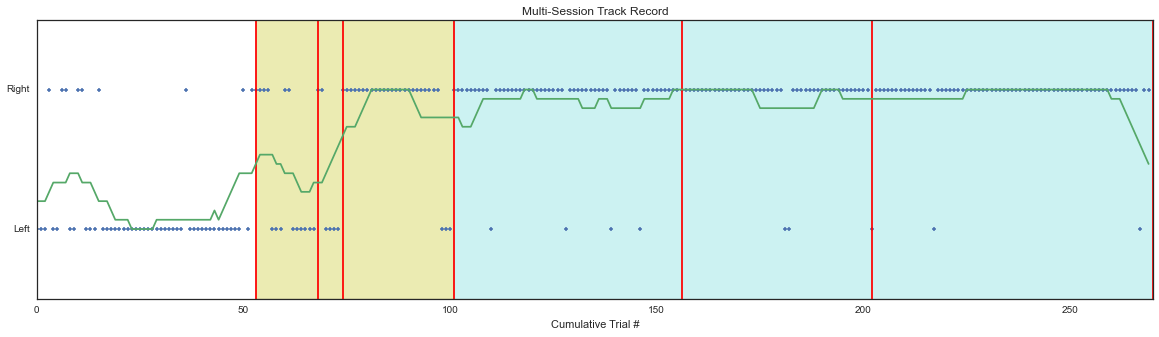

In [9]:
#Plot Correct Track Record across all sessions
plt.figure(figsize = [20,5])

#dot_array = []
len_array = []
for a in range(len(summary)):
    len_array.append(len(summary[a]))
    
len_array = list(np.cumsum(len_array))

plt.plot(b,'.')
plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[0],len_array[3], facecolor = 'y', alpha = 0.3)
plt.axvspan(len_array[3],len_array[6], facecolor = 'c', alpha = 0.2)
plt.xlabel('Cumulative Trial #')
plt.yticks([0,1],['Left','Right'])
plt.title('Multi-Session Track Record')


avgs = []
binsize = 15
kernel = np.ones(binsize,)/float(binsize)
avgs = np.convolve(b,kernel, 'same')
plt.plot(avgs) 

270 270


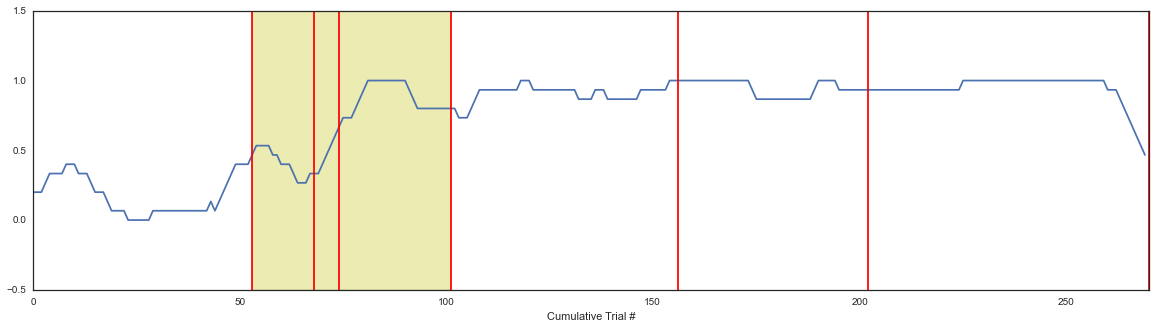

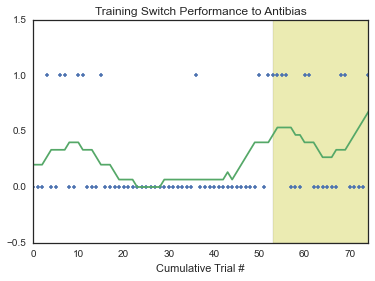

In [10]:
#Moving Average
plt.figure(figsize = [20,5])
avgs = []
binsize = 15
kernel = np.ones(binsize,)/float(binsize)
avgs = np.convolve(b,kernel, 'same')

print len(avgs), len(b)
plt.plot(avgs) 
plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[0],len_array[3], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')

plt.figure(2)
plt.plot(b,'.')
plt.plot(avgs) 
plt.ylim(-0.5,1.5)
plt.xlim(0,len_array[2])
plt.axvspan(len_array[0],len_array[3], facecolor = 'y', alpha = 0.3)
plt.axvspan(len_array[3],len_array[6], facecolor = 'c', alpha = 0.2)
plt.title('Training Switch Performance to Antibias')
plt.xlabel('Cumulative Trial #')

zoom = avgs[len_array[0]-40:len_array[0]+40]
zoom  = pd.Series(zoom)

# Plot Animal Performance

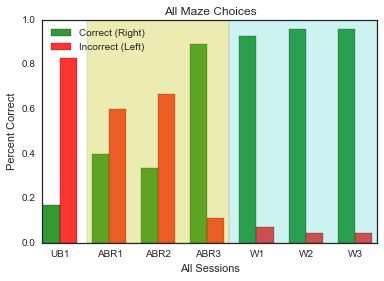

0.169811320755 0.540740740741 0.946558939781


In [26]:
#Plot Correct (R correct, L incorrect)
c = [] #correct/right
for j in range(len(summary)):
    
    correct = list(summary[j].initChoice).count('R')
    perc_correct = correct/float(len(summary[j]))
    c.append(perc_correct)


w = [1-x for x in c]
#wrong/left side

labels = ['UB1', 'ABR1','ABR2', 'ABR3', 'W1', 'W2', 'W3']  #All days
y_pos = np.arange(len(w))

fig, ax = plt.subplots()

bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(y_pos, c, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Correct (Right)')
 
rects2 = plt.bar(y_pos + bar_width, w, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Incorrect (Left)')

plt.legend(loc='best')
plt.xticks(y_pos+bar_width, labels)
plt.xlabel('All Sessions')
plt.ylabel('Percent Correct')
plt.title('All Maze Choices')
plt.axvspan(0.9,3.8, facecolor = 'y', alpha = 0.3)
plt.axvspan(3.8,6.8 , facecolor = 'c', alpha = 0.2)
plt.show()


mu_perc_corrUB_before = np.mean(c[0])
mu_perc_corrAB = np.mean(c[1:4])
mu_perc_corrW = np.mean(c[4:7])

print mu_perc_corrUB_before, mu_perc_corrAB, mu_perc_corrW

# Time stats

[38.6848679245283, 90.11933333333334, 85.09733333333334, 33.78637037037037, 34.03905454545454, 30.932000000000002, 28.475029411764698]


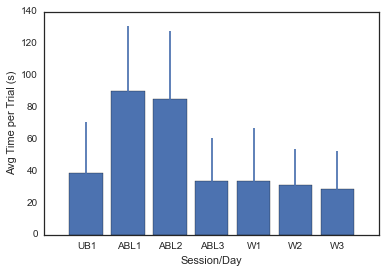

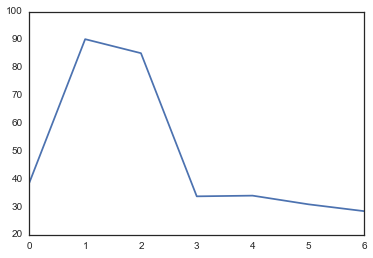

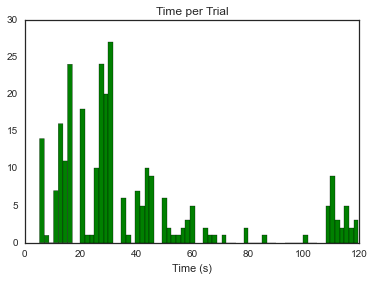

In [12]:
# Mean Time per trial
mu_time = []
std_time = []

[mu_time.append(x.time.mean()) for x in summary]
[std_time.append(x.time.std()) for x in summary]
print mu_time

plt.bar(range(0,len(mu_time)), mu_time, align = "center", yerr = std_time)

labels = ['UB1', 'ABL1', 'ABL2', 'ABL3', 'W1', 'W2','W3']
ypos = np.arange(len(mu_time))
plt.xticks(ypos,labels)
plt.xlabel('Session/Day')
plt.ylabel('Avg Time per Trial (s)')

plt.figure(2)
plt.plot(mu_time,'-')

plt.figure(3)
t = []
[t.append(x.time) for x in summary]

plt.hist(t,8, facecolor = 'g')
plt.title('Time per Trial')
plt.xlabel('Time (s)')
            
            

[11.08120754716981, 11.877599999999997, 4.535333333333334, 8.08311111111111, 5.665381818181819, 4.880173913043479, 7.394500000000001]
[16.374969939324718, 17.975697565642022, 5.398590285126911, 6.543406695253412, 9.551315417436857, 5.837204122615734, 20.480562974348842]


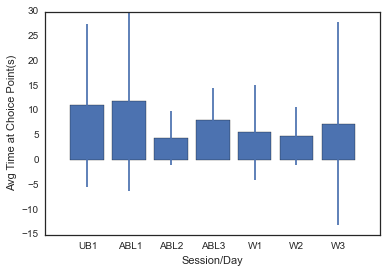

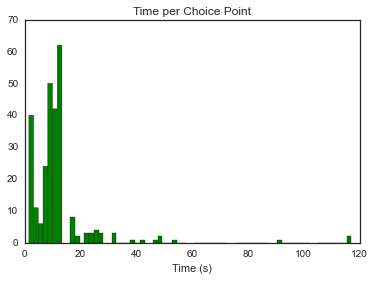

In [13]:
#Time in Choice Point
mu_choice = []
std_choice = []

[mu_choice.append(x.timeChoice.mean()) for x in summary]
[std_choice.append(x.timeChoice.std()) for x in summary]
print mu_choice
print std_choice

plt.bar(range(0,len(mu_choice)), mu_choice, align = "center", yerr = std_choice)
labels = ['UB1', 'ABL1', 'ABL2', 'ABL3', 'W1', 'W2', 'W3']
ypos = np.arange(len(mu_time))
plt.xticks(ypos,labels)
plt.xlabel('Session/Day')
plt.ylabel('Avg Time at Choice Point(s)')

plt.figure(2)
choice = []
[choice.append(x.timeChoice) for x in summary]

plt.hist(choice,8, facecolor = 'g')
plt.title('Time per Choice Point')
plt.xlabel('Time (s)')
            
            

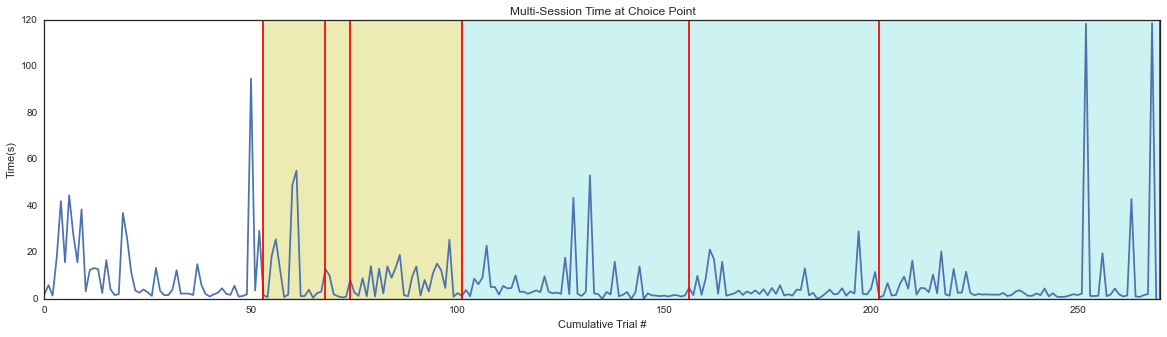

In [14]:
#Plot Choice Time acros all sessions
plt.figure(figsize = [20,5])

tchoice_array = []
len_array = []
for a in range(len(summary)):
    tchoice_array += list(summary[a].timeChoice)
    len_array.append(len(summary[a]))
    
len_array = list(np.cumsum(len_array))

plt.plot(tchoice_array,'-')
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[0],len_array[3], facecolor = 'y', alpha = 0.3)
plt.axvspan(len_array[3],len_array[6], facecolor = 'c', alpha = 0.2)
plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')
plt.title('Multi-Session Time at Choice Point')

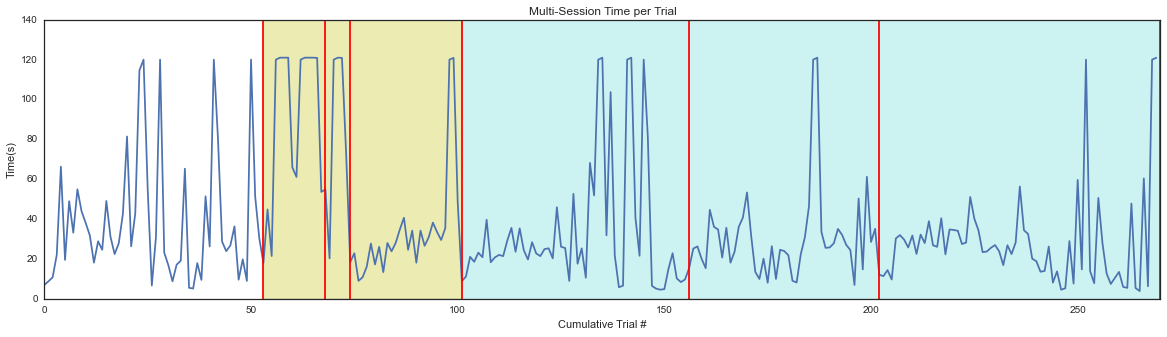

In [15]:
#Plot Trial Time acros all sessions
plt.figure(figsize = [20,5])

time_array = []
len_array = []
for a in range(len(summary)):
    time_array += list(summary[a].time)
    len_array.append(len(summary[a]))
    
len_array = list(np.cumsum(len_array))

plt.plot(time_array,'-')
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[0],len_array[3], facecolor = 'y', alpha = 0.3)
plt.axvspan(len_array[3],len_array[6], facecolor = 'c', alpha = 0.2)
plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')
plt.title('Multi-Session Time per Trial')

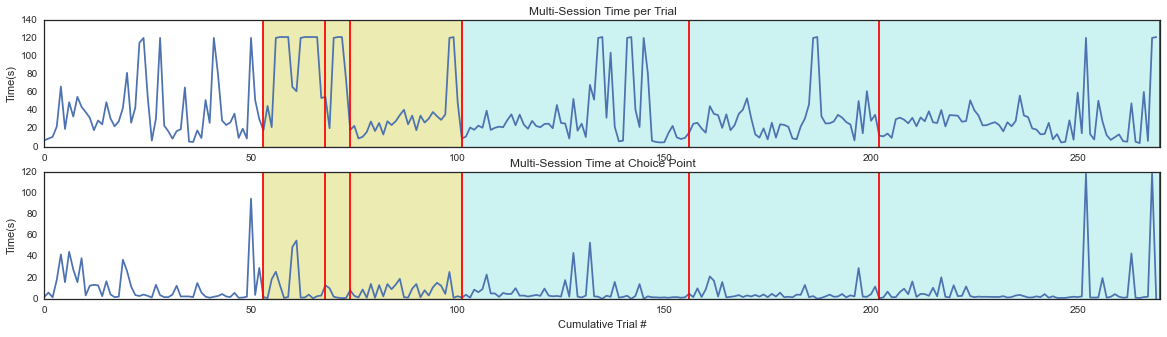

In [16]:
#Subplot
plt.figure(figsize = [20,5])
plt.subplot(211)
plt.plot(time_array,'-')
plt.xlim(0,max(len_array))
plt.axvspan(len_array[0],len_array[3], facecolor = 'y', alpha = 0.3)
plt.axvspan(len_array[3],len_array[6], facecolor = 'c', alpha = 0.2)
[plt.axvline(x =a, color='r') for a in len_array]
#plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')
plt.title('Multi-Session Time per Trial')


plt.subplot(212)
plt.plot(tchoice_array,'-')
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[0],len_array[3], facecolor = 'y', alpha = 0.3)
plt.axvspan(len_array[3],len_array[6], facecolor = 'c', alpha = 0.2)
plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')
plt.title('Multi-Session Time at Choice Point')


28


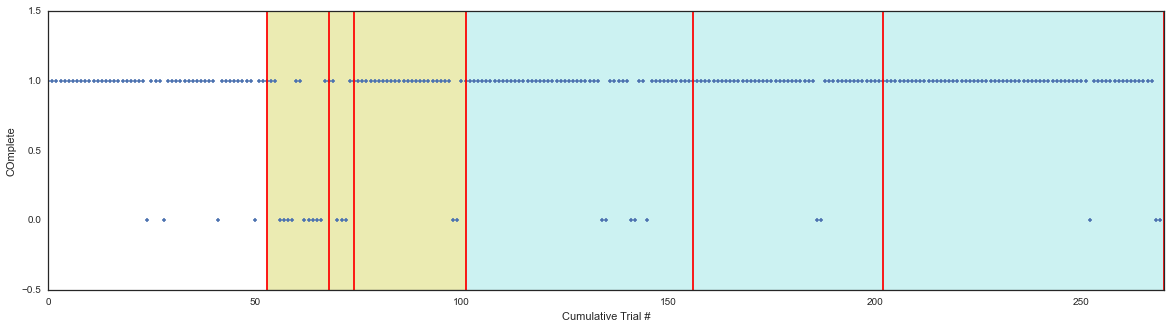

In [17]:
completion  = []
for b in range(len(summary)):
    completion += list(summary[b].Completed)
    
plt.figure(figsize = [20,5])
plt.plot(completion,'.')
plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[0],len_array[3], facecolor = 'y', alpha = 0.3)
plt.axvspan(len_array[3],len_array[6], facecolor = 'c', alpha = 0.2)
plt.xlabel('Cumulative Trial #')
plt.ylabel('Complete')

num_incomplete = completion.count(0)
print num_incomplete

In [18]:
num_deadend = 0
for b in antibias_idx:
    num_deadend += list(summary[b].deadEnd).count(1)

In [19]:
num_deadend

14

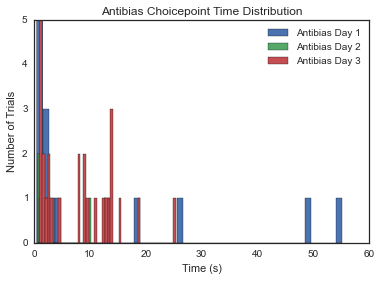

1
2
3


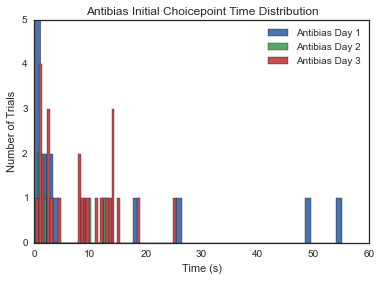

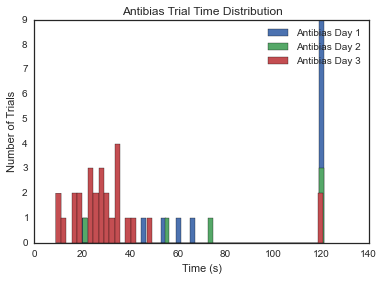

In [20]:
for i in antibias_idx:
    plt.hist(summary[i].timeChoice[~np.isnan(summary[i].timeChoice)],50)
    plt.legend(['Antibias Day 1', 'Antibias Day 2', 'Antibias Day 3'])
plt.title('Antibias Choicepoint Time Distribution') 
plt.xlabel('Time (s)')
plt.ylabel('Number of Trials')
plt.show()  

plt.figure()
for i in antibias_idx:
    print i
    plt.hist(summary[i].initChoiceTime[~np.isnan(summary[i].initChoiceTime)],50)
    plt.legend(['Antibias Day 1', 'Antibias Day 2', 'Antibias Day 3'])
plt.title('Antibias Initial Choicepoint Time Distribution')  
plt.xlabel('Time (s)')
plt.ylabel('Number of Trials')
plt.show() 

plt.figure()
for i in antibias_idx:
    plt.hist(summary[i].time[~np.isnan(summary[i].time)],50)
    plt.legend(['Antibias Day 1', 'Antibias Day 2', 'Antibias Day 3'])
plt.title('Antibias Trial Time Distribution')  
plt.xlabel('Time (s)')
plt.ylabel('Number of Trials')
plt.show() 

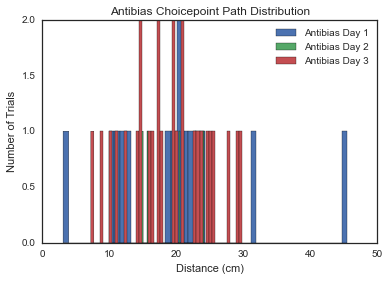

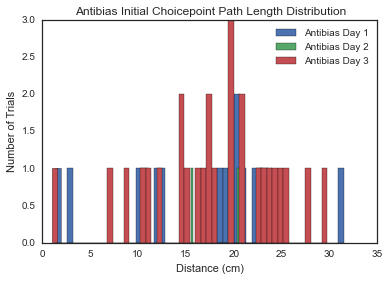

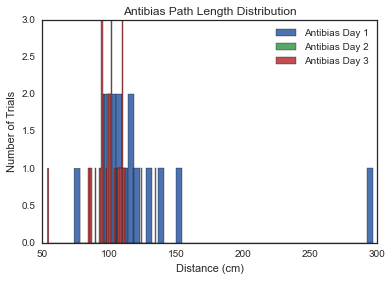

In [21]:
for i in antibias_idx:
    plt.hist(summary[i].choicePath[~np.isnan(summary[i].choicePath)],50)
    plt.legend(['Antibias Day 1', 'Antibias Day 2', 'Antibias Day 3'])
plt.title('Antibias Choicepoint Path Distribution') 
plt.xlabel('Distance (cm)')
plt.ylabel('Number of Trials')
plt.show()  

plt.figure()
for i in antibias_idx:
    plt.hist(summary[i].initChoicePath[~np.isnan(summary[i].initChoicePath)],50)
    plt.legend(['Antibias Day 1', 'Antibias Day 2', 'Antibias Day 3'])
plt.title('Antibias Initial Choicepoint Path Length Distribution')  
plt.xlabel('Distance (cm)')
plt.ylabel('Number of Trials')
plt.show() 

plt.figure()
for i in antibias_idx:
    plt.hist(summary[i].Pathlengths[~np.isnan(summary[i].Pathlengths)],50)
    plt.legend(['Antibias Day 1', 'Antibias Day 2', 'Antibias Day 3'])
plt.title('Antibias Path Length Distribution')  
plt.xlabel('Distance (cm)')
plt.ylabel('Number of Trials')
plt.show() 

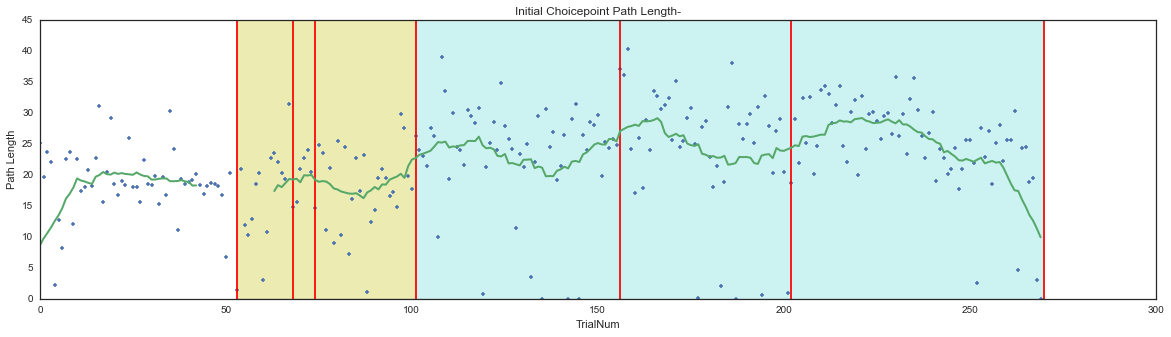

In [22]:
plt.figure(figsize = [20,5])

initpath = []
for i in range(len(summary)):
    initpath = np.append(initpath,summary[i].initChoicePath)

pathavgs = []
binsize = 20
kernel = np.ones(binsize,)/float(binsize)
pathavgs = np.convolve(initpath,kernel, 'same')
   
plt.plot(initpath,'.')
[plt.axvline(x =a, color='r') for a in len_array ]
plt.axvspan(len_array[0],len_array[3], facecolor = 'y', alpha = 0.3)
plt.axvspan(len_array[3],len_array[6], facecolor = 'c', alpha = 0.2)
plt.xlabel('TrialNum')
plt.ylabel('Path Length')
plt.title('Initial Choicepoint Path Length-')
plt.plot(pathavgs,'-',linewidth = 2)
    

48
[15, 6, 27]
mean IdPhi= 9.30436478589
std IdPhi= 18.0300756574
median IdPhi= 1.1625


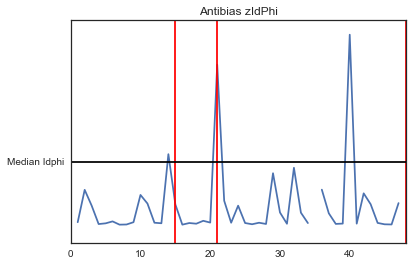

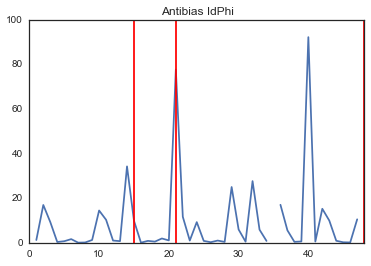

In [23]:
antibias_idphi = []
ab_array = []
for i in antibias_idx:
    antibias_idphi = np.append(antibias_idphi,summary[i].IdPhi.values)
    ab_array.append(len(summary[i]))

print len(antibias_idphi)
zidphi_3days = ((antibias_idphi - np.nanmean(antibias_idphi))/float(np.nanstd(antibias_idphi)))
print ab_array
print "mean IdPhi= "+str(np.nanmean(antibias_idphi))
print "std IdPhi= " + str(np.nanstd(antibias_idphi))
print "median IdPhi= " + str(np.nanmedian(antibias_idphi))
    
ab_array = list(np.cumsum(ab_array))

plt.plot(zidphi_3days)
plt.xlim(0,max(ab_array))
[plt.axvline(x =a, color='r') for a in ab_array ]
plt.axhline(y=np.nanmedian(antibias_idphi),color = 'k')
plt.yticks([np.nanmedian(antibias_idphi)],['Median Idphi'])
plt.title('Antibias zIdPhi')

plt.figure()
plt.plot(antibias_idphi)
plt.xlim(0,max(ab_array))
[plt.axvline(x =a, color='r') for a in ab_array ]
plt.title('Antibias IdPhi')


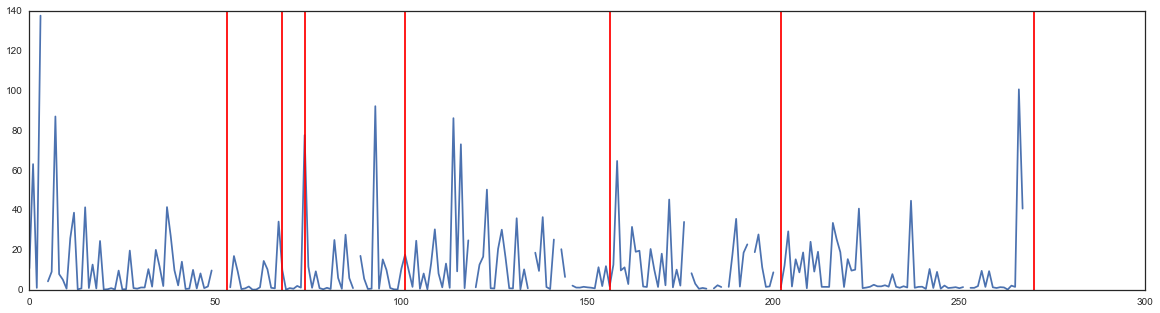

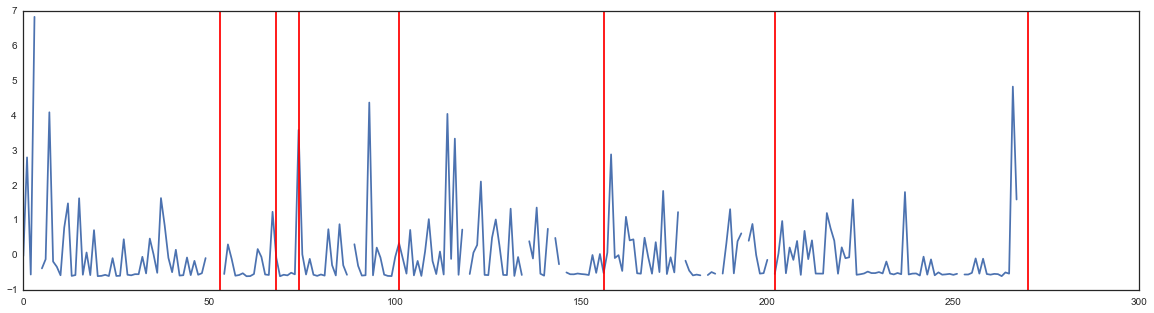

In [27]:
all_idphi = []
all_zidphi = []
for i in range(len(summary)):
    all_idphi = np.append(all_idphi,summary[i].IdPhi.values) 
    
all_zidphi = ((all_idphi - np.nanmean(all_idphi))/float(np.nanstd(all_idphi)))

plt.figure(figsize = [20,5])
plt.plot(all_idphi)
[plt.axvline(x =a, color='r') for a in len_array ]

plt.figure(figsize = [20,5])
plt.plot(all_zidphi)
[plt.axvline(x =a, color='r') for a in len_array ]
        
    

# # WaterR Analysis

169
[55, 46, 68]
mean IdPhi= 11.1975284753
std IdPhi= 16.1318319604
median IdPhi= 2.26224502604
mean zIdPhi= 1.01829372959e-16


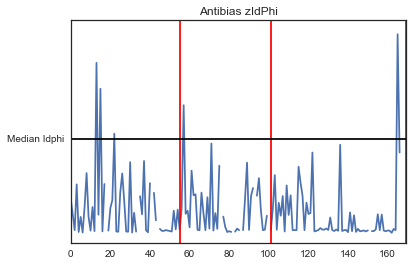

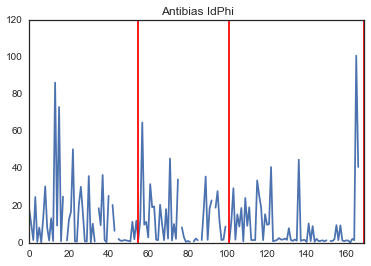

In [39]:
water_idphi = []
w_array = []
for i in water_idx:
    water_idphi = np.append(water_idphi,summary[i].IdPhi.values)
    w_array.append(len(summary[i]))

print len(water_idphi)
zidphi_water = ((water_idphi - np.nanmean(water_idphi))/float(np.nanstd(water_idphi)))
print w_array
print "mean IdPhi= "+str(np.nanmean(water_idphi))
print "std IdPhi= " + str(np.nanstd(water_idphi))
print "median IdPhi= " + str(np.nanmedian(water_idphi))
print "mean zIdPhi= "+str(np.nanmean(zidphi_water))
    
w_array = list(np.cumsum(w_array))

plt.plot(zidphi_water)
plt.xlim(0,max(w_array))
[plt.axvline(x =a, color='r') for a in w_array ]
plt.axhline(y=np.nanmedian(water_idphi),color = 'k')
plt.yticks([np.nanmedian(water_idphi)],['Median Idphi'])
plt.title('Antibias zIdPhi')

plt.figure()
plt.plot(water_idphi)
plt.xlim(0,max(w_array))
[plt.axvline(x =a, color='r') for a in w_array ]
plt.title('Antibias IdPhi')


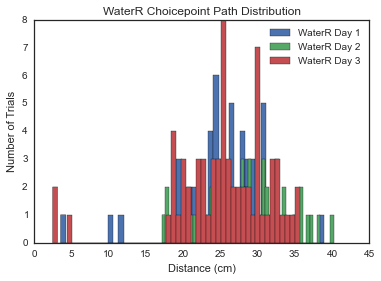

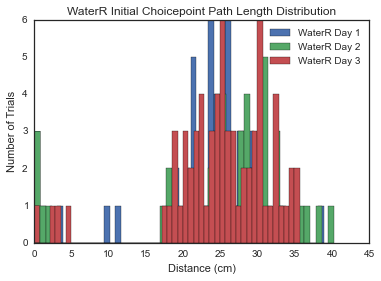

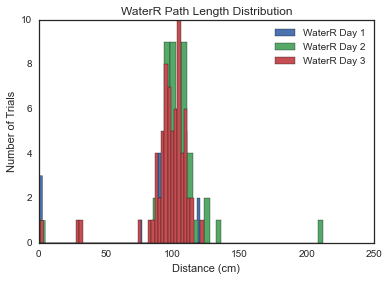

In [35]:
for i in water_idx:
    plt.hist(summary[i].choicePath[~np.isnan(summary[i].choicePath)],50)
    plt.legend(['WaterR Day 1', 'WaterR Day 2', 'WaterR Day 3'])
plt.title('WaterR Choicepoint Path Distribution') 
plt.xlabel('Distance (cm)')
plt.ylabel('Number of Trials')
plt.show()  

plt.figure()
for i in water_idx:
    plt.hist(summary[i].initChoicePath[~np.isnan(summary[i].initChoicePath)],50)
    plt.legend(['WaterR Day 1', 'WaterR Day 2', 'WaterR Day 3'])
plt.title('WaterR Initial Choicepoint Path Length Distribution')  
plt.xlabel('Distance (cm)')
plt.ylabel('Number of Trials')
plt.show() 

plt.figure()
for i in water_idx:
    plt.hist(summary[i].Pathlengths[~np.isnan(summary[i].Pathlengths)],50)
    plt.legend(['WaterR Day 1', 'WaterR Day 2', 'WaterR Day 3'])
plt.title('WaterR Path Length Distribution')  
plt.xlabel('Distance (cm)')
plt.ylabel('Number of Trials')
plt.show() 

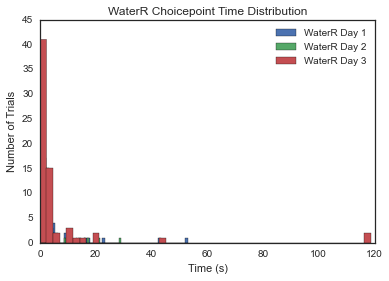

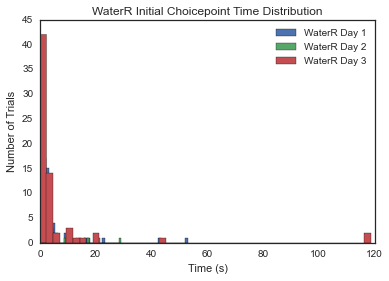

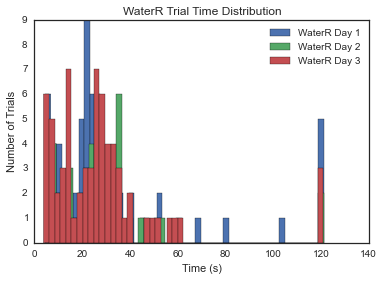

In [37]:
for i in water_idx:
    plt.hist(summary[i].timeChoice[~np.isnan(summary[i].timeChoice)],50)
    plt.legend(['WaterR Day 1', 'WaterR Day 2', 'WaterR Day 3'])
plt.title('WaterR Choicepoint Time Distribution') 
plt.xlabel('Time (s)')
plt.ylabel('Number of Trials')
plt.show()  

plt.figure()
for i in water_idx:
    plt.hist(summary[i].initChoiceTime[~np.isnan(summary[i].initChoiceTime)],50)
    plt.legend(['WaterR Day 1', 'WaterR Day 2', 'WaterR Day 3'])
plt.title('WaterR Initial Choicepoint Time Distribution')  
plt.xlabel('Time (s)')
plt.ylabel('Number of Trials')
plt.show() 

plt.figure()
for i in water_idx:
    plt.hist(summary[i].time[~np.isnan(summary[i].time)],50)
    plt.legend(['WaterR Day 1', 'WaterR Day 2', 'WaterR Day 3'])
plt.title('WaterR Trial Time Distribution')  
plt.xlabel('Time (s)')
plt.ylabel('Number of Trials')
plt.show() 

In [38]:
np.nanmean(water_idphi), np.nanmean(zidphi_water)

(11.197528475251037, 1.0182937295925003e-16)

In [41]:
#Summary vals for all of an animal's sessions
animal_summary = {'Animal' :153,
                  'totalDeadEnd': num_deadend, 
                  'incomplete': num_incomplete, 
                  'meanNumTrials' : mean_trials,
                  'meanTime' : np.mean(time_array),
                  'meanChoiceTime': np.nanmean(tchoice_array),
                  'meanIdPhi': np.nanmean(all_idphi),
                  'stdIdPhi' : np.nanstd(all_idphi),
                  'meanAntibiasIdPhi' : np.nanmean(antibias_idphi),
                  'stdAntibiasIdPhi' : np.nanstd(antibias_idphi),
                  'meanWaterIdPhi' : np.nanmean(water_idphi),
                  'stdWaterIdPhi' : np.nanstd(water_idphi),
                  'meanzIdPhi' : np.nanmean(all_zidphi),
                  'stdzIdPhi': np.nanstd(all_zidphi),
                  'meanAntibiaszIdphi' : np.nanmean(zidphi_3days),
                  'stdAntibiaszIdPhi' : np.nanstd(zidphi_3days),
                  'meanWaterzIdPhi' : np.nanmean(zidphi_water),
                  'stdWaterzIdphi' : np.nanstd(zidphi_water),
                  'medianIdPhi' : np.median(all_idphi),
                  'medianzIdPhi' : np.median(all_zidphi),
                  'numDays': len(summary),
                  'correctBefore': mu_perc_corrUB_before,
                  'correctAntibias': mu_perc_corrAB,
                  'correctWater' : mu_perc_corrW}

In [42]:
animal_summary = pd.Series(animal_summary)

In [43]:
animal_summary.to_csv( path + "/animalsummary153.csv")

In [44]:
animal_summary

Animal                1.530000e+02
correctAntibias       5.407407e-01
correctBefore         1.698113e-01
correctWater          9.465589e-01
incomplete            2.800000e+01
meanAntibiasIdPhi     9.304365e+00
meanAntibiaszIdphi    7.723291e-17
meanChoiceTime        7.591978e+00
meanIdPhi             1.136672e+01
meanNumTrials         3.857143e+01
meanTime              3.724528e+01
meanWaterIdPhi        1.119753e+01
meanWaterzIdPhi       1.018294e-16
meanzIdPhi           -4.914821e-17
medianIdPhi           3.641050e+00
medianzIdPhi         -4.178946e-01
numDays               7.000000e+00
stdAntibiasIdPhi      1.803008e+01
stdAntibiaszIdPhi     1.000000e+00
stdIdPhi              1.848713e+01
stdWaterIdPhi         1.613183e+01
stdWaterzIdphi        1.000000e+00
stdzIdPhi             1.000000e+00
totalDeadEnd          1.400000e+01
dtype: float64